In [7]:
!pip install pandas networkx matplotlib spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import pandas as pd

df = pd.read_csv("dataset_with_explore_and_research_summaries.csv")
df.head()


,id,title,species,environment,effect,abstract,conclusion,source_file,full_text,ai_summary,explore_summary,research_summary
0,2,Behavioral and multiomics,NaN,"soil, water, air",neutral,Behavioral and multiomics analysis of 3D clin...,"In summary, our research underscored that 3D c...",7.41598_2025_Article_90212.pdf,Behavioral and multiomics analysis of 3D clin...,(a) Flowchart of the experimental procedures a...,"Keywords Microgravity, Three-dimensional clino...","Keywords Microgravity, Three-dimensional clino..."
1,3,Madrigal et al. Microbiome (2022) 10...,E. coli,air,"toxic, neutral",Background: Antimicrobial resistance (AMR) has...,"Overall, our computational predictions and val...",2.40168_2022_Article_1332.pdf,Madrigal et al. Microbiome (2022) 10...,The objective of this study was to identify th...,The objective of this study was to identify th...,The objective of this study was to identify th...
2,4,cancers,NaN,air,toxic,Background: Ionizing radiation from galactic c...,s: We provided a,1.cancers-12-00381.pdf,cancers Article NASA GeneLab Platform Utilized...,The results from this analysis highlight novel...,Multiple datasets were included from human or ...,Results Using primarily in vivo animal models ...
3,5,Cell Structure and Function,R. varieornatus,"water, air","toxic, neutral","s Anhydrobiosis, a phenomenon in which organis...","In this study, we expressed R. varieornatus C...",4.csf_49_24035.pdf,Cell Structure and Function Cell Structure and...,"Key words anhydrobiosis, Tardigrades, live ima...","The cDNAs of R. varieornatus CAHS1, CAHS3, CA...",Anhydrobiosis is observed in both microorganis...
4,6,Perspective https://doi.org/10.103 8/s41467-02...,NaN,air,neutral,Perspective https://doi.org/10.103 8/s41467-02...,We are entering an exciting new era of space e...,3.41467_2023_Article_44357.pdf,Perspective https://doi.org/10.103 8/s41467-02...,Ethical issues related to the dangers and sele...,Health concerns and ethical considerations reg...,"In this piece, we lay out several pressing iss..."


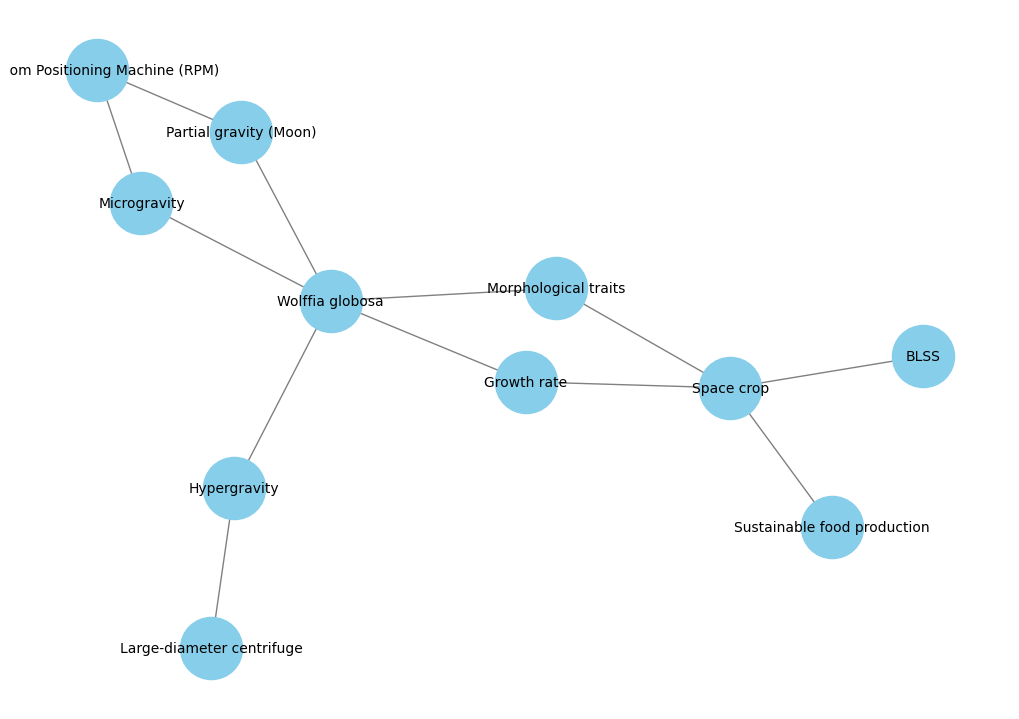

In [11]:
sub_nodes = list(G.nodes)[:20]  # first 20 nodes
subG = G.subgraph(sub_nodes)

plt.figure(figsize=(10, 7))
nx.draw(subG, with_labels=True, node_color="skyblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()


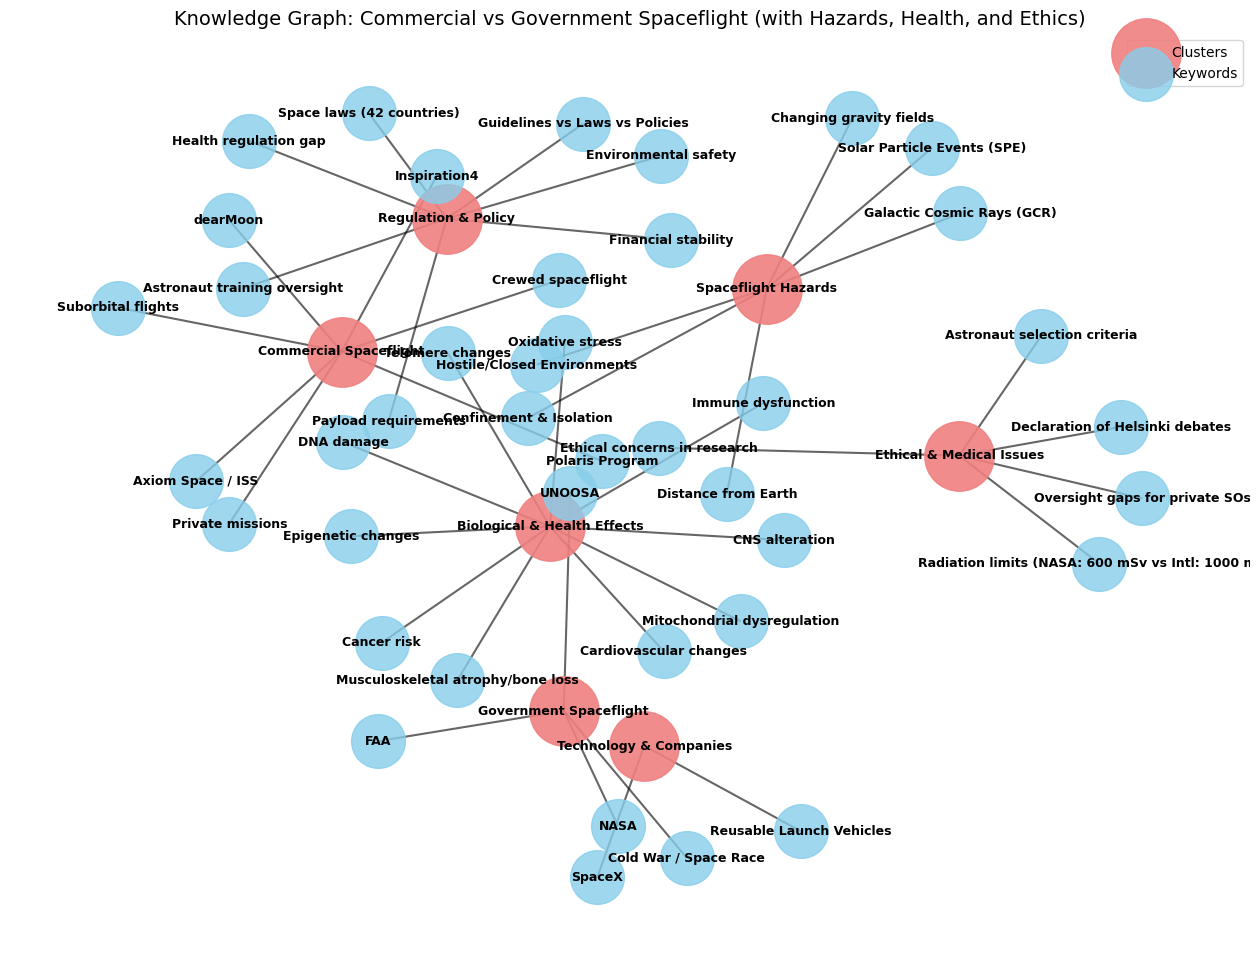

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize graph
G = nx.Graph()

# ------------------------
# Define clusters (categories)
# ------------------------
clusters = {
    "Commercial Spaceflight": [
        "Crewed spaceflight", "Private missions", "Suborbital flights",
        "Inspiration4", "dearMoon", "Polaris Program", "Axiom Space / ISS"
    ],
    "Government Spaceflight": [
        "NASA", "Cold War / Space Race", "FAA", "UNOOSA"
    ],
    "Technology & Companies": [
        "SpaceX", "Reusable Launch Vehicles"
    ],
    "Regulation & Policy": [
        "Environmental safety", "Payload requirements", "Financial stability",
        "Astronaut training oversight", "Health regulation gap",
        "Space laws (42 countries)", "Guidelines vs Laws vs Policies"
    ],
    "Spaceflight Hazards": [
        "Galactic Cosmic Rays (GCR)", "Solar Particle Events (SPE)",
        "Changing gravity fields", "Confinement & Isolation",
        "Hostile/Closed Environments", "Distance from Earth"
    ],
    "Biological & Health Effects": [
        "DNA damage", "Telomere changes", "Oxidative stress",
        "Mitochondrial dysregulation", "Epigenetic changes",
        "Immune dysfunction", "Cardiovascular changes",
        "Musculoskeletal atrophy/bone loss", "CNS alteration", "Cancer risk"
    ],
    "Ethical & Medical Issues": [
        "Astronaut selection criteria", "Oversight gaps for private SOs",
        "Ethical concerns in research", "Declaration of Helsinki debates",
        "Radiation limits (NASA: 600 mSv vs Intl: 1000 mSv)"
    ]
}

# ------------------------
# Add nodes and edges
# ------------------------
for cluster, keywords in clusters.items():
    # Add the main cluster node
    G.add_node(cluster, type="cluster")
    for kw in keywords:
        G.add_node(kw, type="keyword")
        G.add_edge(cluster, kw)  # connect keyword to its cluster

# ------------------------
# Draw graph
# ------------------------
plt.figure(figsize=(16, 12))

# Position nodes
pos = nx.spring_layout(G, k=0.5, seed=42)

# Separate cluster and keyword nodes
cluster_nodes = [n for n, d in G.nodes(data=True) if d["type"] == "cluster"]
keyword_nodes = [n for n, d in G.nodes(data=True) if d["type"] == "keyword"]

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes, node_color="lightcoral", node_size=2500, alpha=0.9, label="Clusters")
nx.draw_networkx_nodes(G, pos, nodelist=keyword_nodes, node_color="skyblue", node_size=1500, alpha=0.8, label="Keywords")

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)

# Labels
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

plt.title("Knowledge Graph: Commercial vs Government Spaceflight (with Hazards, Health, and Ethics)", fontsize=14)
plt.axis("off")
plt.legend(scatterpoints=1)
plt.show()


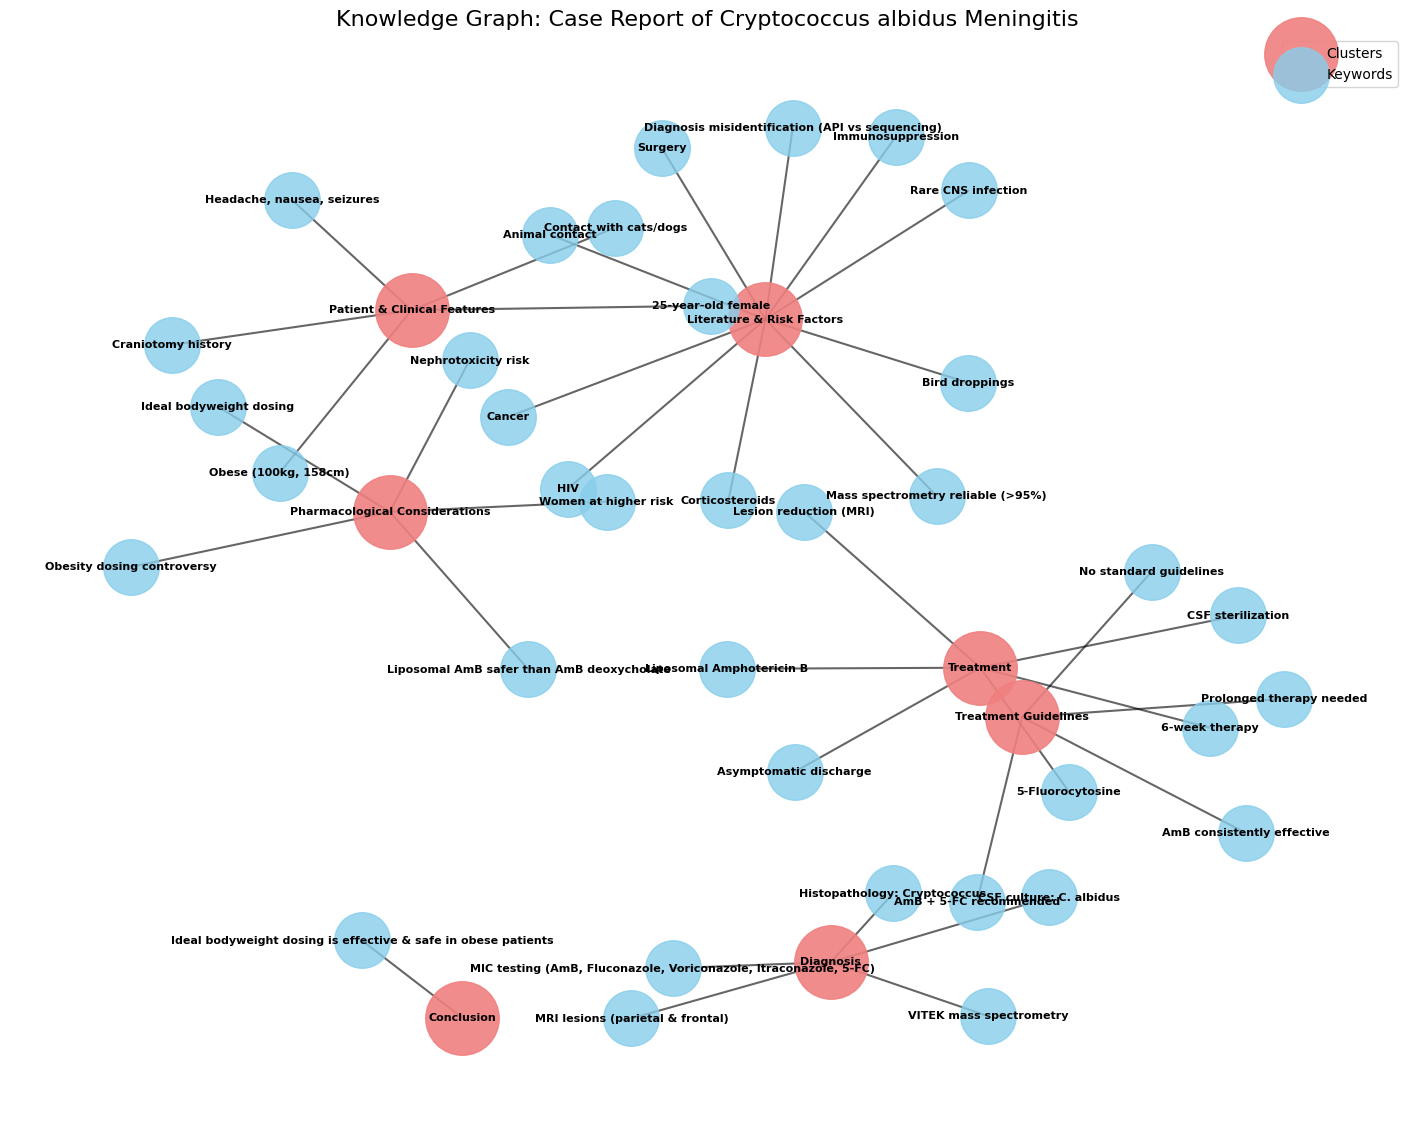

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize graph
G = nx.Graph()

# ------------------------
# Define clusters (categories)
# ------------------------
clusters = {
    "Patient & Clinical Features": [
        "25-year-old female", "Obese (100kg, 158cm)",
        "Craniotomy history", "Contact with cats/dogs",
        "Headache, nausea, seizures"
    ],
    "Diagnosis": [
        "MRI lesions (parietal & frontal)", "Histopathology: Cryptococcus",
        "CSF culture: C. albidus", "VITEK mass spectrometry",
        "MIC testing (AmB, Fluconazole, Voriconazole, Itraconazole, 5-FC)"
    ],
    "Treatment": [
        "Liposomal Amphotericin B", "5-Fluorocytosine",
        "6-week therapy", "Lesion reduction (MRI)",
        "CSF sterilization", "Asymptomatic discharge"
    ],
    "Pharmacological Considerations": [
        "Obesity dosing controversy", "Ideal bodyweight dosing",
        "Nephrotoxicity risk", "Women at higher risk",
        "Liposomal AmB safer than AmB deoxycholate"
    ],
    "Literature & Risk Factors": [
        "Rare CNS infection", "Immunosuppression", "HIV", "Cancer",
        "Corticosteroids", "Bird droppings", "Animal contact", "Surgery",
        "Diagnosis misidentification (API vs sequencing)",
        "Mass spectrometry reliable (>95%)"
    ],
    "Treatment Guidelines": [
        "No standard guidelines", "AmB consistently effective",
        "AmB + 5-FC recommended", "Prolonged therapy needed"
    ],
    "Conclusion": [
        "Ideal bodyweight dosing is effective & safe in obese patients"
    ]
}

# ------------------------
# Add nodes and edges
# ------------------------
for cluster, keywords in clusters.items():
    # Add the main cluster node
    G.add_node(cluster, type="cluster")
    for kw in keywords:
        G.add_node(kw, type="keyword")
        G.add_edge(cluster, kw)  # connect keyword to its cluster

# ------------------------
# Draw graph
# ------------------------
plt.figure(figsize=(18, 14))

# Position nodes
pos = nx.spring_layout(G, k=0.5, seed=42)

# Separate cluster and keyword nodes
cluster_nodes = [n for n, d in G.nodes(data=True) if d["type"] == "cluster"]
keyword_nodes = [n for n, d in G.nodes(data=True) if d["type"] == "keyword"]

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes, node_color="lightcoral", node_size=2800, alpha=0.9, label="Clusters")
nx.draw_networkx_nodes(G, pos, nodelist=keyword_nodes, node_color="skyblue", node_size=1600, alpha=0.8, label="Keywords")

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)

# Labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

plt.title("Knowledge Graph: Case Report of Cryptococcus albidus Meningitis", fontsize=16)
plt.axis("off")
plt.legend(scatterpoints=1)
plt.show()


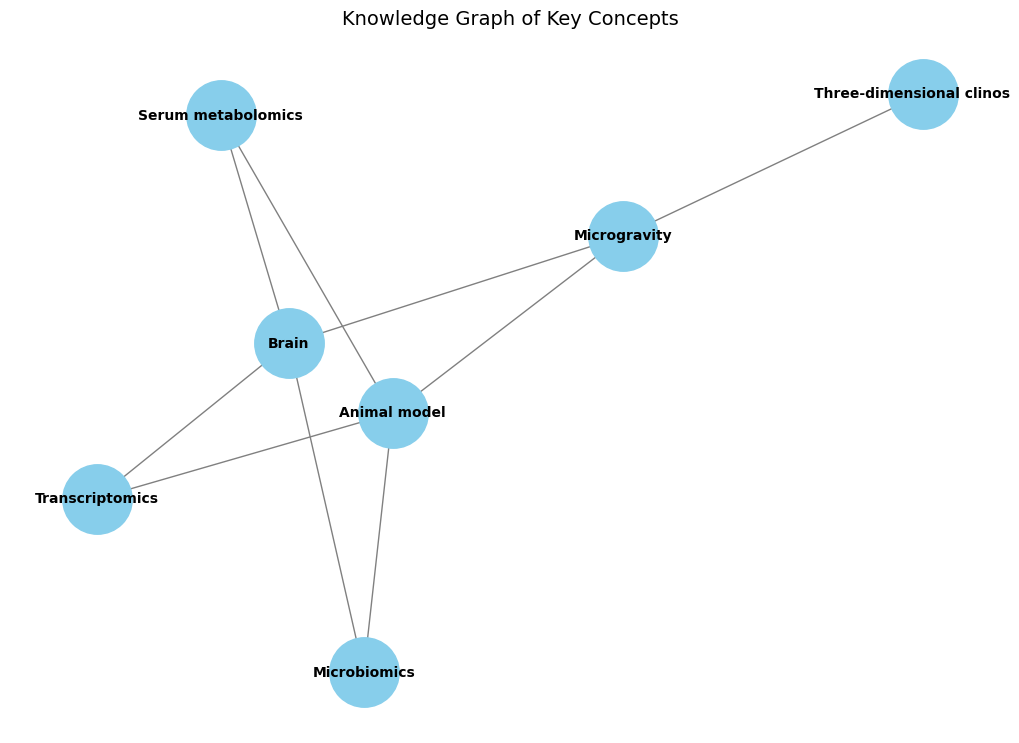

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define keywords (nodes)
keywords = [
    "Microgravity",
    "Three-dimensional clinostat",
    "Brain",
    "Transcriptomics",
    "Microbiomics",
    "Serum metabolomics",
    "Animal model"
]

# Define relationships (edges) between keywords
edges = [
    ("Microgravity", "Three-dimensional clinostat"),
    ("Microgravity", "Brain"),
    ("Brain", "Transcriptomics"),
    ("Brain", "Microbiomics"),
    ("Brain", "Serum metabolomics"),
    ("Animal model", "Microgravity"),
    ("Animal model", "Transcriptomics"),
    ("Animal model", "Microbiomics"),
    ("Animal model", "Serum metabolomics")
]

# Build graph
G = nx.Graph()
G.add_nodes_from(keywords)
G.add_edges_from(edges)

# Draw graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # consistent layout
nx.draw(G, pos, with_labels=True, node_color="skyblue",
        node_size=2500, font_size=10, font_weight="bold", edge_color="gray")

plt.title("Knowledge Graph of Key Concepts", fontsize=14)
plt.show()


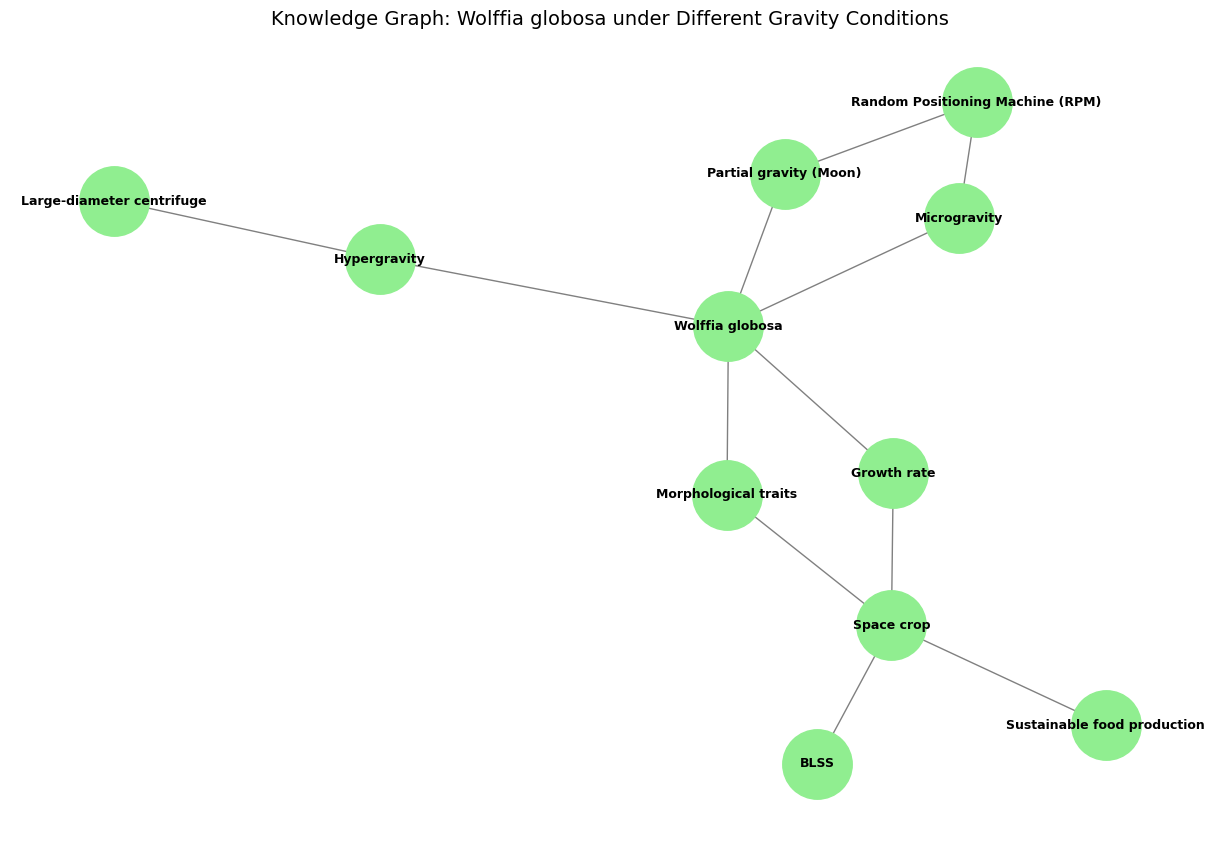

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Define nodes
nodes = [
    "Wolffia globosa", "Microgravity", "Partial gravity (Moon)", "Hypergravity",
    "Random Positioning Machine (RPM)", "Large-diameter centrifuge",
    "Growth rate", "Morphological traits",
    "Space crop", "BLSS", "Sustainable food production"
]

# Define edges (relationships)
edges = [
    ("Wolffia globosa", "Microgravity"),
    ("Wolffia globosa", "Partial gravity (Moon)"),
    ("Wolffia globosa", "Hypergravity"),
    ("Microgravity", "Random Positioning Machine (RPM)"),
    ("Partial gravity (Moon)", "Random Positioning Machine (RPM)"),
    ("Hypergravity", "Large-diameter centrifuge"),
    ("Wolffia globosa", "Growth rate"),
    ("Wolffia globosa", "Morphological traits"),
    ("Growth rate", "Space crop"),
    ("Morphological traits", "Space crop"),
    ("Space crop", "BLSS"),
    ("Space crop", "Sustainable food production")
]

# Build graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightgreen",
        node_size=2500, font_size=9, font_weight="bold", edge_color="gray")

plt.title("Knowledge Graph: Wolffia globosa under Different Gravity Conditions", fontsize=14)
plt.show()



In [6]:
import pandas as pd

# Define all graphs as edge lists
edges_wolffia = [
    ("Wolffia globosa", "Microgravity"),
    ("Wolffia globosa", "Partial gravity (Moon)"),
    ("Wolffia globosa", "Hypergravity"),
    ("Microgravity", "Random Positioning Machine (RPM)"),
    ("Partial gravity (Moon)", "Random Positioning Machine (RPM)"),
    ("Hypergravity", "Large-diameter centrifuge"),
    ("Wolffia globosa", "Growth rate"),
    ("Wolffia globosa", "Morphological traits"),
    ("Growth rate", "Space crop"),
    ("Morphological traits", "Space crop"),
    ("Space crop", "BLSS"),
    ("Space crop", "Sustainable food production")
]

edges_brain = [
    ("Microgravity", "Brain"),
    ("Brain", "Transcriptomics"),
    ("Transcriptomics", "Gene Expression"),
    ("Gene Expression", "Neuroplasticity"),
    ("Brain", "Animal model")
]

edges_microbiome = [
    ("Microgravity", "Microbiome"),
    ("Microbiome", "Gut health"),
    ("Gut health", "Immune response"),
    ("Microbiome", "Animal model")
]

edges_serum = [
    ("Microgravity", "Serum metabolomics"),
    ("Serum metabolomics", "Metabolic pathways"),
    ("Metabolic pathways", "Energy balance"),
    ("Serum metabolomics", "Biomarkers")
]

# Combine into dataframe with graph labels
data = []
for src, tgt in edges_wolffia:
    data.append(("Wolffia Study", src, tgt))
for src, tgt in edges_brain:
    data.append(("Brain Study", src, tgt))
for src, tgt in edges_microbiome:
    data.append(("Microbiome Study", src, tgt))
for src, tgt in edges_serum:
    data.append(("Serum Study", src, tgt))

df = pd.DataFrame(data, columns=["Graph", "Source", "Target"])

# Save as CSV
df.to_csv("knowledge_graphs.csv", index=False)

df.head(12)  # show sample


,Graph,Source,Target
0,Wolffia Study,Wolffia globosa,Microgravity
1,Wolffia Study,Wolffia globosa,Partial gravity (Moon)
2,Wolffia Study,Wolffia globosa,Hypergravity
3,Wolffia Study,Microgravity,Random Positioning Machine (RPM)
4,Wolffia Study,Partial gravity (Moon),Random Positioning Machine (RPM)
5,Wolffia Study,Hypergravity,Large-diameter centrifuge
6,Wolffia Study,Wolffia globosa,Growth rate
7,Wolffia Study,Wolffia globosa,Morphological traits
8,Wolffia Study,Growth rate,Space crop
9,Wolffia Study,Morphological traits,Space crop
